In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tensorflow.keras import Input
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LeakyReLU
from keras.layers import LSTM, SimpleRNN, GRU, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
PATH='/content/gdrive/My Drive/Graduation_Project/fre_d200.csv'
train_data = pd.read_csv(PATH,sep=',', encoding='CP949', header=None)
#test = pd.read_csv('test.csv',sep=',', encoding='CP949')
train_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
195,5.100000e-43,6.530000e-12,6.800000e-12,7.320000e-12,8.230000e-12,1.080000e-11,1.550000e-12,2.920000e-10,9.080000e-10,9.910000e-10,3.630000e-10,8.900000e-10,3.160000e-10,1.030000e-09,3.360000e-11,2.490000e-10,1.630000e-09,1.780000e-10,1.420000e-11,6.570000e-10,1.100000e-10,1.230000e-10,9.490000e-11,2.760000e-10,9.350000e-11,1.280000e-10,3.710000e-10,1.550000e-10,2.470000e-10,5.460000e-13,4.200000e-11,2.100000e-11,9.170000e-12,8.950000e-15,5.130000e-12,5.960000e-12,1.420000e-12,5.710000e-13,5.180000e-14,3.100000e-15,...,3.990000e-15,3.910000e-15,3.830000e-15,3.750000e-15,3.680000e-15,3.620000e-15,3.550000e-15,3.490000e-15,3.430000e-15,3.380000e-15,3.330000e-15,3.280000e-15,3.230000e-15,3.180000e-15,3.140000e-15,3.100000e-15,3.060000e-15,3.030000e-15,2.990000e-15,2.960000e-15,2.930000e-15,2.900000e-15,2.880000e-15,2.850000e-15,2.830000e-15,2.810000e-15,2.790000e-15,2.770000e-15,2.750000e-15,2.740000e-15,2.730000e-15,2.710000e-15,2.700000e-15,2.690000e-15,2.690000e-15,2.680000e-15,2.680000e-15,2.670000e-15,1,NaN
196,1.470000e-42,4.510000e-12,4.940000e-12,5.850000e-12,7.740000e-12,1.220000e-11,2.170000e-11,2.370000e-10,6.540000e-10,1.910000e-10,6.670000e-11,8.440000e-10,8.830000e-10,1.190000e-10,5.000000e-11,3.500000e-10,7.350000e-10,3.920000e-12,3.370000e-10,4.860000e-10,2.460000e-10,1.030000e-10,3.400000e-10,2.970000e-10,2.190000e-10,4.910000e-11,3.090000e-10,1.200000e-11,6.700000e-11,2.560000e-10,2.480000e-11,9.210000e-12,3.560000e-12,3.480000e-12,2.640000e-12,3.930000e-13,1.740000e-13,1.760000e-12,3.270000e-14,5.310000e-14,...,6.640000e-15,6.580000e-15,6.510000e-15,6.450000e-15,6.400000e-15,6.340000e-15,6.290000e-15,6.230000e-15,6.180000e-15,6.140000e-15,6.090000e-15,6.050000e-15,6.010000e-15,5.970000e-15,5.930000e-15,5.890000e-15,5.860000e-15,5.830000e-15,5.800000e-15,5.770000e-15,5.740000e-15,5.710000e-15,5.690000e-15,5.670000e-15,5.640000e-15,5.630000e-15,5.610000e-15,5.590000e-15,5.570000e-15,5.560000e-15,5.550000e-15,5.540000e-15,5.530000e-15,5.520000e-15,5.510000e-15,5.500000e-15,5.500000e-15,5.500000e-15,1,NaN
197,6.170000e-43,7.190000e-12,7.390000e-12,7.740000e-12,8.200000e-12,9.260000e-12,1.480000e-11,2.280000e-11,3.190000e-10,2.190000e-10,6.840000e-10,7.130000e-10,2.310000e-10,2.680000e-12,8.300000e-10,1.800000e-11,6.450000e-10,4.540000e-10,1.110000e-09,7.210000e-10,1.480000e-11,1.200000e-10,7.600000e-11,4.650000e-11,9.980000e-11,8.400000e-11,9.770000e-11,3.190000e-12,1.650000e-10,1.200000e-10,8.420000e-11,2.470000e-11,7.480000e-11,1.450000e-12,8.930000e-12,7.170000e-12,2.760000e-13,5.130000e-13,4.090000e-13,4.820000e-13,...,9.500000e-15,9.350000e-15,9.190000e-15,9.050000e-15,8.910000e-15,8.780000e-15,8.660000e-15,8.540000e-15,8.420000e-15,8.310000e-15,8.210000e-15,8.110000e-15,8.020000e-15,7.930000e-15,7.850000e-15,7.770000e-15,7.690000e-15,7.620000e-15,7.550000e-15,7.490000e-15,7.430000e-15,7.370000e-15,7.320000e-15,7.270000e-15,7.220000e-15,7.180000e-15,7.140000e-15,7.110000e-15,7.070000e-15,7.040000e-15,7.020000e-15,6.990000e-15,6.970000e-15,6.950000e-15,6.940000e-15,6.920000e-15,6.910000e-15,6.910000e-15,1,NaN
198,1.310000e-42,4.070000e-11,4.350000e-11,4.900000e-11,5.960000e-11,8.030000e-11,1.900000e-10,8.000000e-10,1.850000e-10,9.870000e-11,3.850000e-10,8.060000e-10,3.410000e-10,3.140000e-10,9.960000e-11,6.300000e-10,2.420000e-10,2.100000e-10,1.650000e-10,7.600000e-11,1.880000e-11,3.780000e-10,7.640000e-11,3.430000e-11,1.230000e-10,4.570000e-10,4.330000e-12,1.560000e-10,1.200000e-10,3.440000e-13,5.500000e-11,4.460000e-11,4.350000e-11,2.220000e-11,4.740000e-12,1.480000e-11,5.930000e-12,4.050000e-12,5.370000e-12,1.790000e-12,...,7.540000e-14,7.440000e-14,7.340000e-14,7.250000e-14,7.160000e-14,7.080000e-14,7.000000e-14,6.920000e-14,6.850000e

In [5]:
# traindata = pd.read_csv('dataset/traindata.csv', header=None)
# testdata = pd.read_csv('dataset/testdata.csv', header=None)
# text_max_words = 144

X = train_data.iloc[:, :149]
y = train_data.iloc[:, 149]

print(X.shape)
print(y.shape)

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state = 1001)
# 길이 맞추기
# X_train = sequence.pad_sequences(X_train, maxlen = text_max_words)
# X_test = sequence.pad_sequences(X_test, maxlen = text_max_words)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


scaler = Normalizer().fit(X_train)
trainX = scaler.transform(X_train)

scaler = Normalizer().fit(X_test)
testT = scaler.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))
print(X_train.shape)
print(X_test.shape)
# print(X_train)
# print(y_train)

(200, 149)
(200,)
X_train shape: (140, 149)
X_test shape: (60, 149)
y_train shape: (140, 2)
y_test shape: (60, 2)
(140, 1, 149)
(60, 1, 149)


In [ ]:
batch_size = 4

# 1. define the network lstm_model1
model = Sequential()
# model.add(Embedding(32, 32))
model.add(LSTM(256, input_dim = 149, return_sequences=True))  
# model.add(LSTM(256, input_shape = (1, 43)))  
model.add(LeakyReLU(alpha=0.1))
# model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
# model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(LSTM(32))
# model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.1))

# fully connected layer
"""
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
"""

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, None, 256)         415744    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, None, 256)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, None, 256)         1024      
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, None, 128)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, None, 128)         512       
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)               

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('/content/gdrive/My Drive/Graduation_Project/LSTM_w_v3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, callbacks=[es, mc], validation_split = 0.2)

Epoch 1/200
28/28 [==============================] - 4s 47ms/step - loss: 0.6399 - acc: 0.7865 - val_loss: 0.6910 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /content/gdrive/My Drive/Graduation_Project/LSTM_w_v3.h5
Epoch 2/200
28/28 [==============================] - 0s 7ms/step - loss: 0.4640 - acc: 0.8401 - val_loss: 0.6849 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/200
28/28 [==============================] - 0s 6ms/step - loss: 0.4528 - acc: 0.7779 - val_loss: 0.6814 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3396 - acc: 0.8565 - val_loss: 0.6727 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2304 - acc: 0.9067 - val_loss: 0.6622 - val_acc: 0.5357

Epoch 00005: val_acc improved from 0.50000 to 0.53571, saving mo

In [6]:
from keras.models import load_model
loaded_model = load_model('/content/gdrive/My Drive/Graduation_Project/LSTM_w_v3.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

2/2 [==============================] - 32s 9ms/step - loss: 0.3007 - acc: 0.9667

 테스트 정확도: 0.9667


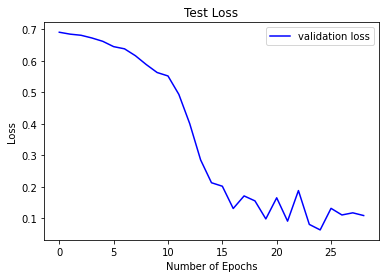

In [ ]:
# Plot the loss and accuracy curves for training and validation 
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [7]:
from keras.models import load_model
loaded_model = load_model('/content/gdrive/My Drive/Graduation_Project/LSTM_w_v3.h5')

In [15]:
from sklearn.metrics import classification_report

pred = loaded_model.predict(X_test)
pred = np.argmax(pred, axis=1)

test_y = np.argmax(y_test, axis=1)

print(test_y.shape, pred.shape)
print(test_y[:5], pred[:5])


(60,) (60,)
[1 1 1 1 1] [1 1 1 1 1]


In [16]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

